In [1]:
import pandas as pd
pd.options.display.max_rows = 8

In [2]:
url = 'https://raw.githubusercontent.com/panda-kim/pandas/main/ch04.csv'

In [3]:
df_ex1 = pd.read_csv(url)
df_ex1

,이름,점수
0,노성빈,22
1,문주용,52
2,최태주,71
3,황혁범,53
...,...,...
96,신민기,22
97,지도훈,24
98,류형석,41
99,유남길,67


In [4]:
df_ex1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      100 non-null    object
 1   점수      100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [5]:
df_ex1.describe()

,점수
count,100.000000
mean,50.890000
std,18.143588
min,20.000000
25%,35.750000
50%,50.500000
75%,65.500000
max,79.000000


In [6]:
# rank 실습
data = [['송중기', 91, 82, 17], ['권보아', 82, 95, 17], 
        ['김나현', 71, 95, 18], ['박효신', 90, 72, 18], 
        ['김선미', 80, 72, 19], ['강승주', 78, 95, 19]]
df = pd.DataFrame(data, columns=['이름', '영어', '국어', '나이'])
df1 = df.copy() # df와 똑같은 데이터프레임을 복사해 df1으로 선언
df

,이름,영어,국어,나이
0,송중기,91,82,17
1,권보아,82,95,17
2,김나현,71,95,18
3,박효신,90,72,18
4,김선미,80,72,19
5,강승주,78,95,19


In [7]:
df1['영어'].rank()

0    6.0
1    4.0
2    1.0
3    5.0
4    3.0
5    2.0
Name: 영어, dtype: float64

In [8]:
# 영어열로 오름차순으로 등수매기기 (원본 보존을 위해 df1으로 실습합니다)
df1['영어오름'] = df1['영어'].rank()
df1

,이름,영어,국어,나이,영어오름
0,송중기,91,82,17,6.0
1,권보아,82,95,17,4.0
2,김나현,71,95,18,1.0
3,박효신,90,72,18,5.0
4,김선미,80,72,19,3.0
5,강승주,78,95,19,2.0


In [9]:
# 영어열로 내림차순으로 등수매기기
df1['영어오름'] = df1['영어'].rank(ascending=False)
df1

,이름,영어,국어,나이,영어오름
0,송중기,91,82,17,1.0
1,권보아,82,95,17,3.0
2,김나현,71,95,18,6.0
3,박효신,90,72,18,2.0
4,김선미,80,72,19,4.0
5,강승주,78,95,19,5.0


In [10]:
# 국어열로 오름차순으로 등수매길때 동점자를 다르게
df1['average'] = df1['국어'].rank(ascending=False) # alt+shift+아래방향키 한 줄 복사
df1['min'] = df1['국어'].rank(method='min', ascending=False) 
df1['max'] = df1['국어'].rank(method='max', ascending=False)
df1['first'] = df1['국어'].rank(method='first', ascending=False) # 나이 순으로 정렬되어 있어서 우선순위가 권보아
df1['dense'] = df1['국어'].rank(method='dense', ascending=False)
df1

,이름,영어,국어,나이,영어오름,average,min,max,first,dense
0,송중기,91,82,17,1.0,4.0,4.0,4.0,4.0,2.0
1,권보아,82,95,17,3.0,2.0,1.0,3.0,1.0,1.0
2,김나현,71,95,18,6.0,2.0,1.0,3.0,2.0,1.0
3,박효신,90,72,18,2.0,5.5,5.0,6.0,5.0,3.0
4,김선미,80,72,19,4.0,5.5,5.0,6.0,6.0,3.0
5,강승주,78,95,19,5.0,2.0,1.0,3.0,3.0,1.0


In [11]:
# astype
data = [[8.2, 9, '17'], [7.1, 9, '18'], [9.3, 7, '18'], [7.8, 7, '19']]
df = pd.DataFrame(data, columns=['A', 'B', 'C'])
df1 = df.copy() # df와 똑같은 데이터프레임을 복사해 df1으로 선언
df

,A,B,C
0,8.2,9,17
1,7.1,9,18
2,9.3,7,18
3,7.8,7,19


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       4 non-null      int64  
 2   C       4 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 228.0+ bytes


In [13]:
# 데이터 프레임의 자료형을 문자열로 바꾸기
df1.astype('str').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       4 non-null      object
 1   B       4 non-null      object
 2   C       4 non-null      object
dtypes: object(3)
memory usage: 228.0+ bytes


In [14]:
# 데이터 프레임의 자료형을 정수로 바꾸기
df1.astype('int').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       4 non-null      int64
 1   B       4 non-null      int64
 2   C       4 non-null      int64
dtypes: int64(3)
memory usage: 228.0 bytes


In [15]:
df1['C'] = df1['C'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       4 non-null      int64  
 2   C       4 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 228.0 bytes


In [16]:
df.astype({'C':'int'}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       4 non-null      int64  
 2   C       4 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 228.0 bytes


In [17]:
df.astype({'A':'str', 'C':'int'}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       4 non-null      object
 1   B       4 non-null      int64 
 2   C       4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 228.0+ bytes


In [18]:
# 데이터에서 실습하기
df_ex1['등수'] = df_ex1['점수'].rank(method='min', ascending=False).astype('int')
df_ex1

,이름,점수,등수
0,노성빈,22,94
1,문주용,52,49
2,최태주,71,19
3,황혁범,53,47
...,...,...,...
96,신민기,22,94
97,지도훈,24,90
98,류형석,41,69
99,유남길,67,24


In [19]:
# 불리언 인덱싱
data = [[85, 96, 94], [79, 87, 94], [93, 85, 73], [81, 84, 88]]
df = pd.DataFrame(data, index=list('ABCD'), columns=['국어', '영어', '수학'])
df

,국어,영어,수학
A,85,96,94
B,79,87,94
C,93,85,73
D,81,84,88


In [20]:
df[[True, False, True, True]]
df.loc[[True, False, True, True]]

,국어,영어,수학
A,85,96,94
C,93,85,73
D,81,84,88


In [21]:
df.loc[:, [True, False, True]]

,국어,수학
A,85,94
B,79,94
C,93,73
D,81,88


In [22]:
df['국어'] > 80

A     True
B    False
C     True
D     True
Name: 국어, dtype: bool

In [23]:
df[df['국어']>80]

,국어,영어,수학
A,85,96,94
C,93,85,73
D,81,84,88


In [24]:
df[df.mean(axis=1) >= 85]

,국어,영어,수학
A,85,96,94
B,79,87,94


In [25]:
# 2차원 배열로 불리언 인덱싱
df[df > 80]

,국어,영어,수학
A,85.0,96,94.0
B,NaN,87,94.0
C,93.0,85,NaN
D,81.0,84,88.0


In [26]:
# 데이터로 실습
df_ex1[df_ex1['등수'] == 1]

,이름,점수,등수
35,구은탁,79,1
37,민일택,79,1
93,문지용,79,1


In [27]:
df_ex1.loc[df_ex1['등수'] == 1, '이름']

35    구은탁
37    민일택
93    문지용
Name: 이름, dtype: object

In [28]:
# 40점 이하는 낙제, 낙제가 아닌 성적만
df_ex1[df_ex1['점수'] > 40]

,이름,점수,등수
1,문주용,52,49
2,최태주,71,19
3,황혁범,53,47
5,주기원,44,63
...,...,...,...
94,양호근,58,39
95,차지우,61,30
98,류형석,41,69
99,유남길,67,24


In [29]:
# 불리언 마스킹
list1 = [85, 79, 93, 81]
data = [[85, 96, 94], [79, 87, 94], [93, 85, 73], [81, 84, 88]]
df = pd.DataFrame(data, index=list('ABCD'), columns=['국어', '영어', '수학'])
df

,국어,영어,수학
A,85,96,94
B,79,87,94
C,93,85,73
D,81,84,88


In [30]:
df.mask(df > 80)

,국어,영어,수학
A,NaN,NaN,NaN
B,79.0,NaN,NaN
C,NaN,NaN,73.0
D,NaN,NaN,NaN


In [31]:
df.mask(df > 80, other='합격')

,국어,영어,수학
A,합격,합격,합격
B,79,합격,합격
C,합격,합격,73
D,합격,합격,합격


In [32]:
cond1 = df > 80
df.mask(cond1, other='합격').mask(~cond1, other='불합격')

,국어,영어,수학
A,합격,합격,합격
B,불합격,합격,합격
C,합격,합격,불합격
D,합격,합격,합격


In [33]:
df1 = df.copy()
cond2 = df1['국어'] < 80
df1['국어성적'] = df1['국어'].mask(cond2, '불합격').mask(~cond2, '합격')
df1

,국어,영어,수학,국어성적
A,85,96,94,합격
B,79,87,94,불합격
C,93,85,73,합격
D,81,84,88,합격


In [34]:
import numpy as np
df1 = df.copy()
df1['국어성적'] = np.where(cond2, '불합격', '합격')
df1

,국어,영어,수학,국어성적
A,85,96,94,합격
B,79,87,94,불합격
C,93,85,73,합격
D,81,84,88,합격


In [35]:
# 데이터로 실습하기
cond = df_ex1['점수'] > 40
df_ex1['비고'] = df_ex1['점수'].mask(cond, '패스').mask(~cond, '낙제')
df_ex1

,이름,점수,등수,비고
0,노성빈,22,94,낙제
1,문주용,52,49,패스
2,최태주,71,19,패스
3,황혁범,53,47,패스
...,...,...,...,...
96,신민기,22,94,낙제
97,지도훈,24,90,낙제
98,류형석,41,69,패스
99,유남길,67,24,패스


In [36]:
df_ex1['비고'] = np.where(cond, '패스','낙제')
df_ex1

,이름,점수,등수,비고
0,노성빈,22,94,낙제
1,문주용,52,49,패스
2,최태주,71,19,패스
3,황혁범,53,47,패스
...,...,...,...,...
96,신민기,22,94,낙제
97,지도훈,24,90,낙제
98,류형석,41,69,패스
99,유남길,67,24,패스


In [37]:
# cut
s = pd.Series([71, 92, 77, 70])
s

0    71
1    92
2    77
3    70
dtype: int64

In [38]:
pd.cut(s, [0, 70, 80, 90, 100])

0     (70, 80]
1    (90, 100]
2     (70, 80]
3      (0, 70]
dtype: category
Categories (4, interval[int64, right]): [(0, 70] < (70, 80] < (80, 90] < (90, 100]]

In [39]:
pd.cut(s, [0, 70, 80, 90, 100], labels=False) # labels 인자에 False를 넣으면 코드화

0    1
1    3
2    1
3    0
dtype: int64

In [40]:
pd.cut(s, [0, 70, 80, 90, 100], labels=['F','C','B','A']) # labels 인자에 False를 넣으면 코드화

0    C
1    A
2    C
3    F
dtype: category
Categories (4, object): ['F' < 'C' < 'B' < 'A']

In [41]:
# 데이터로 실습하기
df_ex1['학점'] = pd.cut(df_ex1['점수'], bins=[0, 40, 50, 60, 70, 80], labels=['F', 'D', 'C', 'B', 'A'])
df_ex1

,이름,점수,등수,비고,학점
0,노성빈,22,94,낙제,F
1,문주용,52,49,패스,C
2,최태주,71,19,패스,A
3,황혁범,53,47,패스,C
...,...,...,...,...,...
96,신민기,22,94,낙제,F
97,지도훈,24,90,낙제,F
98,류형석,41,69,패스,D
99,유남길,67,24,패스,B


In [42]:
# category 자료형
s = pd.Series(['S', 'M', 'XL']*10000000)
s

0            S
1            M
2           XL
3            S
            ..
29999996    XL
29999997     S
29999998     M
29999999    XL
Length: 30000000, dtype: object

In [43]:
print(s.memory_usage())

240000132


In [44]:
print(s.astype('category').memory_usage())

30000264


In [45]:
# Categorical 함수로 category 자료형으로 바꾸면 순서를 부여할 수 있다
s1 = pd.Series(pd.Categorical(s, categories=['S', 'M', 'XL'], ordered=True))
s1

0            S
1            M
2           XL
3            S
            ..
29999996    XL
29999997     S
29999998     M
29999999    XL
Length: 30000000, dtype: category
Categories (3, object): ['S' < 'M' < 'XL']

In [46]:
s1.sort_values()

0            S
8486343      S
27171216     S
8486346      S
            ..
15000017    XL
15000020    XL
15000026    XL
29999999    XL
Length: 30000000, dtype: category
Categories (3, object): ['S' < 'M' < 'XL']

In [47]:
# 빈도수 파악하기
data = [['A', 'a'], ['A', 'b'], ['C', 'a'], ['B', 'b'], ['A', 'a']]
df = pd.DataFrame(data, columns=['col1', 'col2'])
df

,col1,col2
0,A,a
1,A,b
2,C,a
3,B,b
4,A,a


In [48]:
df['col1'].value_counts()

col1
A    3
C    1
B    1
Name: count, dtype: int64

In [49]:
df['col1'].value_counts(normalize=True)

col1
A    0.6
C    0.2
B    0.2
Name: proportion, dtype: float64

In [50]:
df.value_counts('col1')

col1
A    3
B    1
C    1
Name: count, dtype: int64

In [51]:
df.value_counts(['col1', 'col2'], normalize = True)

col1  col2
A     a       0.4
      b       0.2
B     b       0.2
C     a       0.2
Name: proportion, dtype: float64

In [52]:
df.value_counts()

col1  col2
A     a       2
      b       1
B     b       1
C     a       1
Name: count, dtype: int64

In [53]:
df.value_counts(normalize=True)

col1  col2
A     a       0.4
      b       0.2
B     b       0.2
C     a       0.2
Name: proportion, dtype: float64

In [54]:
df_ex1['학점'].value_counts().sort_index(ascending=False)

학점
A    20
B    14
C    16
D    20
F    30
Name: count, dtype: int64

<Axes: xlabel='학점'>

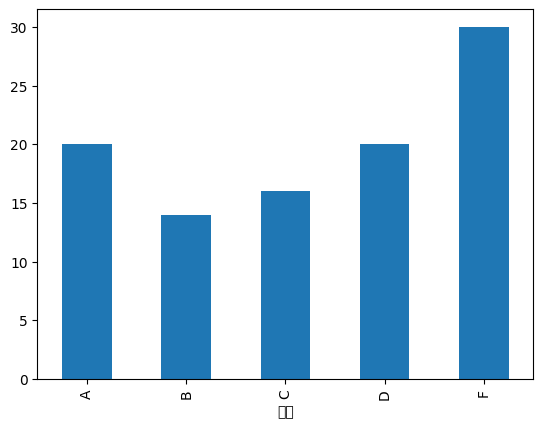

In [55]:
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')
df_ex1['학점'].value_counts().sort_index(ascending=False).plot(kind='bar')

### 프로젝트 코드 요약

<Axes: xlabel='학점'>

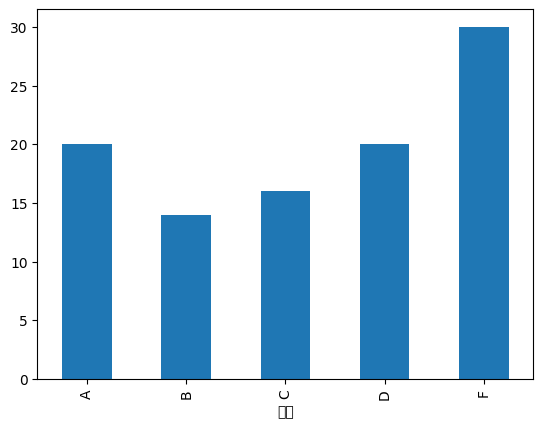

In [56]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
url = 'https://raw.githubusercontent.com/panda-kim/pandas/main/ch04.csv'

# csv 파일에서 데이터 프레임 부르기
df_ex1 = pd.read_csv(url)

# 등수 매기기
df_ex1['등수'] = df_ex1['점수'].rank(method='min', ascending=False).astype('int')

# 낙제(40점이하)와 패스를 구분한 비고 열 만들기
cond1 = df_ex1['점수'] > 40
df_ex1['비고'] = df_ex1['점수'].mask(cond1, '패스').mask(~cond1, '낙제')

# 학점 열 만들기
bin = [0, 40, 50, 60, 70, 80]
label = ['F', 'D', 'C', 'B', 'A']
df_ex1['학점'] = pd.cut(df_ex1['점수'], bins=bin, labels=label)

# 각 학점당 인원수 파악하고 그래프로 그리기
df_ex1['학점'].value_counts().sort_index(ascending=False).plot(kind='bar')